In [14]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
np_Xt = np.load("/content/drive/MyDrive/X_train.npy")
np_Yt = np.load("/content/drive/MyDrive/y_train.npy")

In [4]:
np_at = np.load("/content/drive/MyDrive/X_test.npy")
np_bt = np.load("/content/drive/MyDrive/y_test.npy")

In [5]:
# data pre-processing
print(np.shape(np_Xt))
print(np.shape(np_Yt))
m = np.shape(np_Xt)[0]
np_X = np.zeros((m,784))
for i in range(m):
  np_X[i]= np_Xt[i].ravel()
print(np.shape(np_X))
np_Y = np.zeros((m,10))
for i in range(m):
  t = np.zeros(10)
  t[(np_Yt[i])] = 1
  np_Y[i]=t
print(np_Y)
np_X = np.transpose(np_X)
np_Y = np.transpose(np_Y)
print(np.shape(np_X))
print(np.shape(np_Y))

(60000, 28, 28)
(60000,)
(60000, 784)
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
(784, 60000)
(10, 60000)


In [6]:
# data pre-processing
print(np.shape(np_at))
print(np.shape(np_bt))
mb = np.shape(np_at)[0]
np_Xtest = np.zeros((mb,784))
for i in range(mb):
  np_Xtest[i]= np_at[i].ravel()
print(np.shape(np_Xtest))
np_Ytest = np.zeros((mb,10))
for i in range(mb):
  t = np.zeros(10)
  t[(np_bt[i])] = 1
  np_Ytest[i]=t
print(np_Ytest)
np_Xtest = np.transpose(np_Xtest)
np_Ytest= np.transpose(np_Ytest)

(10000, 28, 28)
(10000,)
(10000, 784)
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [7]:
print(np.shape(np_Y))

(10, 60000)


In [8]:
print(np.shape(np_Ytest))
print(np.shape(np_Xtest))

(10, 10000)
(784, 10000)


In [ ]:
class NN:

  def __init__(self,bsize,dims,hidden_layer,num_class,m,act):
    self.num_samples = m
    self.layers=hidden_layer
    self.layers.append(num_class)
    self.feature_dim = dims
    self.sgd_bsize = bsize
    self.acti_func = act                        # 0 -> sigmoid                1 -> ReLU
    self.wts = {}
    self.bias ={}
    self.num_layers = len(self.layers)
    self.op_fwd = {}
    self.z_fwd={}
    self.delta_bwd = {}
    for i in range(len(self.layers)):
          #print(i)
          n = self.layers[i]
          if i!=0:
            nt = self.layers[i-1]
          else:
            nt = dims
          self.wts[i] = np.random.randn(n,nt)   # initialization scheme as suggested in a lecture of CS229. random for weights
          self.bias[i] = np.zeros((n,1))   # initialization for biases - all zero
    
  def sigmoid(self,z):
    z *= -1
    c = np.exp(z)
    c +=1 
    t = (1.0/c)
    return t

  def relu(self,arr):
    arr = np.maximum(arr,0)
    return arr
  
  def relu_der(self,arr):
    arr[arr<=0] = 0
    arr[arr>0] = 1
    return arr

  def forward(self,X):
    if self.acti_func==0:
      for i in range(self.num_layers):
        if i==0:
          np_t = np.dot(self.wts[i],X) + self.bias[i]   #z = WX + b
        else:
          np_t = np.dot(self.wts[i],self.op_fwd[i-1])+self.bias[i] # for non input layers input is the ouput of previous layers
        self.z_fwd[i]=np_t
        self.op_fwd[i]=(self.sigmoid(np_t))    # a = activation(z)
    else:
      for i in range(self.num_layers):
        if i==0:
          np_t = np.dot(self.wts[i],X) + self.bias[i]   #z = WX + b
        else:
          np_t = np.dot(self.wts[i],self.op_fwd[i-1])+self.bias[i] # for non input layers input is the ouput of previous layers
        self.z_fwd[i]=np_t
        if i==self.num_layers-1:
          self.op_fwd[i]= (self.sigmoid(np_t))   # ouput layer still has sigmoid as activation functio
        else:
          self.op_fwd[i]=(self.relu(np_t))    # a = activation(z)

  def backprop(self,Y,X):
    itr = self.num_layers-1
    if self.acti_func==0:
      while itr >=0:
        #print(itr)
        if itr == self.num_layers-1:
          # output layer
          o = self.op_fwd[itr]
          store = np.multiply((Y-o),o)          # delta for output layer for sigmoid - (Y-O)*(O)*(1-O)  .... here * means element wise multiplication
          store = np.multiply(store,(1-o))
          self.delta_bwd[itr]= store
        else:
          temp = np.dot(np.transpose(self.wts[itr+1]),self.delta_bwd[itr+1])     # the iterative step in backprop - [W(i+1).T] dot [delta(i+1)] * derivative of activation function
          t = np.multiply(self.op_fwd[itr],(1-self.op_fwd[itr]))    
          temp = np.multiply(temp,t)
          self.delta_bwd[itr]=temp
          # hidden layers
        itr-=1
    else:
      while itr >=0:
        #print(itr)
        if itr == self.num_layers-1:
          # output layer
          o = self.op_fwd[itr]
          store = np.multiply((Y-o),o)          # delta for output layer for sigmoid - (Y-O)*(O)*(1-O)  .... here * means element wise multiplication
          store = np.multiply(store,(1-o))
          self.delta_bwd[itr]= store
        else:
          temp = np.dot(np.transpose(self.wts[itr+1]),self.delta_bwd[itr+1])     # the iterative step in backprop - [W(i+1).T] dot [delta(i+1)] * derivative of activation function
          t =   self.relu_der(self.z_fwd[itr])
          temp = np.multiply(temp,t)
          self.delta_bwd[itr]=temp
          # hidden layers
        itr-=1
  
  def loss_fn(self,Y):
    o = self.op_fwd[(self.num_layers)-1]
    mat = Y-o
    mat = np.multiply(mat,mat)
    loss = np.sum(mat)
    loss /= self.sgd_bsize
    loss /= 2.0
    return loss

  def train_setup(self,X,Y,alpha):
    loss = 0.0
    self.forward(X)
    self.backprop(Y,X)
    itr = self.num_layers-1
    while itr>=0:
      if itr !=0:
        self.wts[itr] = self.wts[itr] + alpha*(np.dot(self.delta_bwd[itr],np.transpose(self.op_fwd[itr-1])))
        use = np.sum(self.delta_bwd[itr],axis=1,keepdims=True)   #figure this math out from non vectorized formulations
        # Hint - all dimensions of Yi are independent of each other as seen in the loss function and we have summation over all samples
        # done in order to handle the shape of bias
        self.bias[itr] = self.bias[itr] + alpha*(use)     
      else:
        self.wts[itr]= self.wts[itr]+alpha*(np.dot(self.delta_bwd[itr],np.transpose(X)))
        use = np.sum(self.delta_bwd[itr],axis=1,keepdims=True)   #figure this math out from non vectorized formulations
        self.bias[itr]= self.bias[itr]+ alpha*(use)
      itr -=1
    loss = self.loss_fn(Y)
    return loss
  
  def train_mbgd(self,X,Y,epochs,alpha):
    b = self.sgd_bsize
    m = self.num_samples
    num_batches = int(m/b)
    np_loss = np.zeros((epochs,num_batches))
    for epoch in range(epochs):
      for i in range(num_batches):
        col_l = i*b
        col_r = ((i+1)*b)
        #print(col_l)
        #print(col_r)
        X_b = X[:,col_l:col_r]
        Y_b = Y[:,col_l:col_r]
        #print(np.shape(X_b))
        #print(np.shape(Y_b))
        l = self.train_setup(X_b,Y_b,alpha)
        np_loss[epoch][i]=l
    #print(np_loss)
    return np_loss

  def train_mbgd_adaptive(self,X,Y,epochs):
    b = self.sgd_bsize
    m = self.num_samples
    num_batches = int(m/b)
    np_loss = np.zeros((epochs,num_batches))
    for epoch in range(epochs):
      for i in range(num_batches):
        col_l = i*b
        col_r = ((i+1)*b)
        #print(col_l)
        #print(col_r)
        X_b = X[:,col_l:col_r]
        Y_b = Y[:,col_l:col_r]
        #print(np.shape(X_b))
        #print(np.shape(Y_b))
        alpha = (0.5)/math.sqrt(epoch+1)
        l = self.train_setup(X_b,Y_b,alpha)
        np_loss[epoch][i]=l
    #print(np_loss)
    return np_loss
    
  def accu(self,X,Y):
    self.forward(X)
    op = self.op_fwd[(self.num_layers)-1]
    use = np.shape(X)[1]
    num_c=0
    y_ind = np.argmax(Y,axis=0)
    y_op = np.argmax(op,axis=0)
    for i in range(len(y_op)):
      if y_ind[i]==y_op[i]:
        num_c +=1
    print(num_c)
    acc = (num_c/use)
    return acc


Training a neural network

In [ ]:
m = np.shape(np_X)[1]
print(m)

60000


In [ ]:
n = NN(100,784,[1],10,m,0)
loss = n.train_mbgd(np_X,np_Y,100,0.001)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: overflow encountered in exp


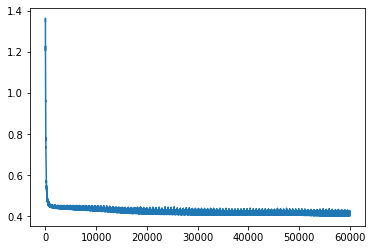

In [ ]:
plot_l = loss.ravel()
pts = np.shape(plot_l)[0]
plt_x = np.linspace(1,pts,pts)
plt.plot(plt_x,plot_l)


In [ ]:
acc = n.accu(np_X,np_Y)
print(acc)

11708
0.19513333333333333


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: overflow encountered in exp


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: overflow encountered in exp


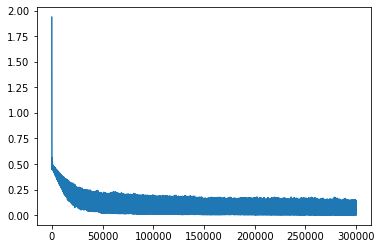

In [ ]:
n = NN(100,784,[10],10,m,0)
loss = n.train_mbgd(np_X,np_Y,500,0.001)
plot_l = loss.ravel()
pts = np.shape(plot_l)[0]
plt_x = np.linspace(1,pts,pts)
plt.plot(plt_x,plot_l)

In [ ]:
acc = n.accu(np_X,np_Y)
print(acc)

56759
0.9459833333333333


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: overflow encountered in exp


In [ ]:
print(n.accu(np_Xtest,np_Ytest))

8538
0.8538


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: overflow encountered in exp


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: overflow encountered in exp


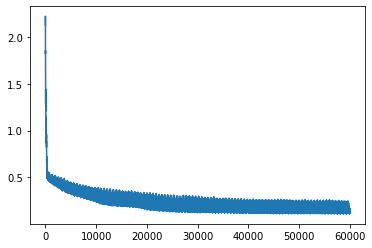

In [ ]:
n = NN(100,784,[50],10,m,0)
loss = n.train_mbgd(np_X,np_Y,100,0.001)
plot_l = loss.ravel()
pts = np.shape(plot_l)[0]
plt_x = np.linspace(1,pts,pts)
plt.plot(plt_x,plot_l)

In [ ]:
acc = n.accu(np_X,np_Y)
print(acc)

44384
0.7397333333333334


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: overflow encountered in exp


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: overflow encountered in exp


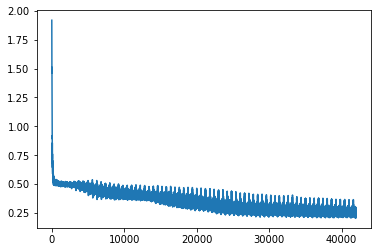

In [ ]:
n = NN(100,784,[100],10,m,0)
loss = n.train_mbgd(np_X,np_Y,70,0.001)
plot_l = loss.ravel()
pts = np.shape(plot_l)[0]
plt_x = np.linspace(1,pts,pts)
plt.plot(plt_x,plot_l)

In [ ]:
acc = n.accu(np_X,np_Y)
print(acc)

32974
0.5495666666666666


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: overflow encountered in exp


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: overflow encountered in exp


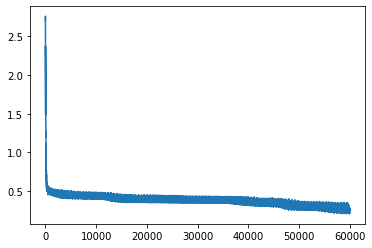

In [ ]:
n = NN(100,784,[500],10,m,0)
loss = n.train_mbgd(np_X,np_Y,100,0.001)
plot_l = loss.ravel()
pts = np.shape(plot_l)[0]
plt_x = np.linspace(1,pts,pts)
plt.plot(plt_x,plot_l)

In [ ]:
acc = n.accu(np_X,np_Y)
print(acc)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: overflow encountered in exp


34461
0.57435


ADAPTIVE LEARNING

6000
0.1
1000
0.1


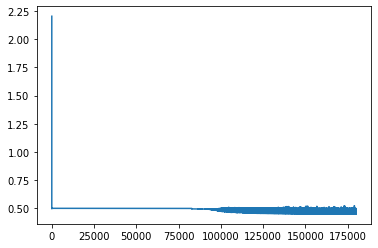

In [ ]:
n = NN(100,784,[50],10,m,0)
loss = n.train_mbgd_adaptive(np_X,np_Y,300)
plot_l = loss.ravel()
pts = np.shape(plot_l)[0]
plt_x = np.linspace(1,pts,pts)
plt.plot(plt_x,plot_l)
print(n.accu(np_X,np_Y))
print(n.accu(np_Xtest,np_Ytest))

6000
0.1
1000
0.1


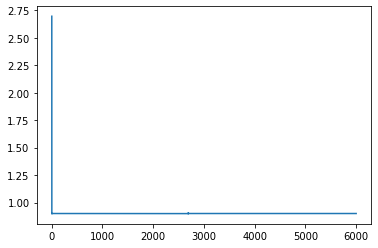

In [ ]:
n = NN(100,784,[100],10,m,0)
loss = n.train_mbgd_adaptive(np_X,np_Y,10)
plot_l = loss.ravel()
pts = np.shape(plot_l)[0]
plt_x = np.linspace(1,pts,pts)
plt.plot(plt_x,plot_l)
print(n.accu(np_X,np_Y))
print(n.accu(np_Xtest,np_Ytest))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in exp


53712
0.8952
7756
0.7756


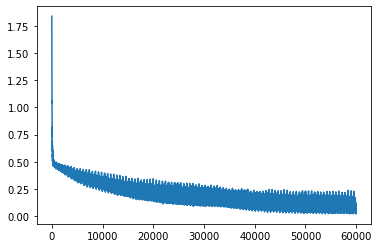

In [ ]:
n = NN(100,784,[10],10,m,0)
loss = n.train_mbgd(np_X,np_Y,100,0.001)
plot_l = loss.ravel()
pts = np.shape(plot_l)[0]
plt_x = np.linspace(1,pts,pts)
plt.plot(plt_x,plot_l)
print(n.accu(np_X,np_Y))
print(n.accu(np_Xtest,np_Ytest))

In [ ]:
n = NN(100,784,[100,100],10,m,0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in exp


44113
0.7352166666666666
6580
0.658


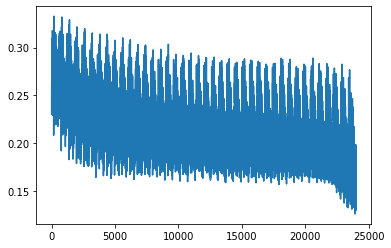

In [ ]:
loss = n.train_mbgd(np_X,np_Y,40,0.001)
plot_l = loss.ravel()
pts = np.shape(plot_l)[0]
plt_x = np.linspace(1,pts,pts)
plt.plot(plt_x,plot_l)
print(n.accu(np_X,np_Y))
print(n.accu(np_Xtest,np_Ytest))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in exp


7374
0.1229
1220
0.122


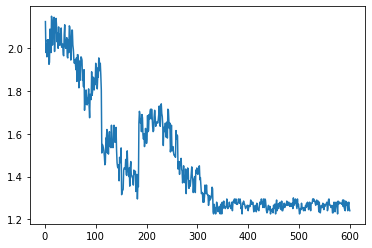

In [ ]:
n = NN(100,784,[100,100],10,m,1)
loss = n.train_mbgd(np_X,np_Y,1,0.001)
plot_l = loss.ravel()
pts = np.shape(plot_l)[0]
plt_x = np.linspace(1,pts,pts)
plt.plot(plt_x,plot_l)
print(n.accu(np_X,np_Y))
print(n.accu(np_Xtest,np_Ytest))

In [ ]:
print(n.delta_bwd[0])
print(n.delta_bwd[1])
print(n.delta_bwd[2])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[ 0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0.  0. -0. -0. -0. -0.
  -0. -0.  0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.
  -0. -0. -0. -0.  0. -0.  0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0. -0.
  -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0.
   0.  0. -0. -0. -0. -0. -0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0.
   0. -0.  0.  0. -0. -0.  0. -0. -0. -0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.

In [ ]:
np_X /= 255
np_Xtest /= 255

One important fact that i observed was when i had ReLU as activation function in hidden layers due to it's very high range in +ve half of real plane .. vanishing gradients was a very big problem ... which has been resolved by data normalization. Thus, stopping overflows and vanishing gradients.

56313
0.93855
8519
0.8519


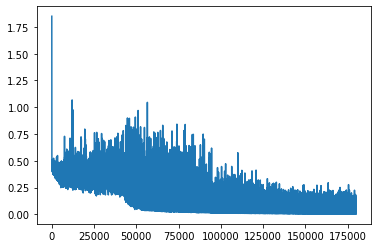

In [ ]:
n = NN(100,784,[100,100],10,m,1)
loss = n.train_mbgd(np_X,np_Y,300,0.001)
plot_l = loss.ravel()
pts = np.shape(plot_l)[0]
plt_x = np.linspace(1,pts,pts)
plt.plot(plt_x,plot_l)
print(n.accu(np_X,np_Y))
print(n.accu(np_Xtest,np_Ytest))

SCIKIT MLP CLASSIFIER

In [10]:
clf = MLPClassifier(hidden_layer_sizes=(100,100),activation='relu',solver='sgd',batch_size=100,verbose=True)

In [12]:
np_X = np.transpose(np_X)
np_Y = np.transpose(np_Y)
np_Xtest = np.transpose(np_Xtest)
np_Ytest = np.transpose(np_Ytest)

In [13]:
clf.fit(np_X,np_Y)

Iteration 1, loss = inf
Iteration 2, loss = 0.29458830
Iteration 3, loss = 0.22853315
Iteration 4, loss = 0.19744183
Iteration 5, loss = 0.17090563
Iteration 6, loss = 0.15661984
Iteration 7, loss = 0.14250192
Iteration 8, loss = 0.13289615
Iteration 9, loss = 0.12610442
Iteration 10, loss = 0.11722872
Iteration 11, loss = 0.11143856
Iteration 12, loss = 0.10537023
Iteration 13, loss = 0.09808470
Iteration 14, loss = 0.09533899
Iteration 15, loss = 0.08992381
Iteration 16, loss = 0.08747330
Iteration 17, loss = 0.08315861
Iteration 18, loss = 0.08061238
Iteration 19, loss = 0.07702209
Iteration 20, loss = 0.07427098
Iteration 21, loss = 0.06943282
Iteration 22, loss = 0.06955920
Iteration 23, loss = 0.06702007
Iteration 24, loss = 0.06594313
Iteration 25, loss = 0.06265838
Iteration 26, loss = 0.05954972
Iteration 27, loss = 0.05846615
Iteration 28, loss = 0.05854770
Iteration 29, loss = 0.05712952
Iteration 30, loss = 0.05582016
Iteration 31, loss = 0.05381007
Iteration 32, loss = 0.0

MLPClassifier(activation='relu', alpha=0.0001, batch_size=100, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=True,
              warm_start=False)

In [15]:
y_pred = clf.predict(np_Xtest)

In [16]:
print(accuracy_score(np_Ytest,y_pred))

0.8929


In [17]:
y_train = clf.predict(np_X)

In [18]:
print(accuracy_score(np_Y,y_train))

0.9976
